# Library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import warnings
import time
pd.set_option('display.max_columns', None)
# Suppress Matplotlib warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [2]:
start = time.time()

In [3]:
master_data = pd.read_csv('Data/master_data.csv')

In [4]:
X = master_data.drop(['subject_id', 'hadm_id', 'admittime','admitdate',
                      'admitdate_diff','<30', '<60', '>365'], axis=1)

Y_30 = master_data['<30']
Y_60 = master_data['<60']
Y_365 = master_data['>365']
X.shape, Y_30.shape


((2216714, 66), (2216714,))

## For 30 days

# Random Forrest

In [5]:
t1= time.time()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y_30, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print('Time: ', round(time.time()-t1)/60)

# Print the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

print('Time: ', round(time.time()-t1)/60)

Accuracy: 0.9175942780195019
Time:  9.9
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94    310170
           1       0.88      0.84      0.86    133173

    accuracy                           0.92    443343
   macro avg       0.91      0.89      0.90    443343
weighted avg       0.92      0.92      0.92    443343

Time:  9.916666666666666


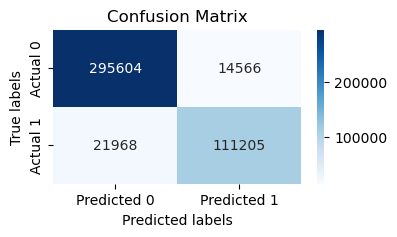

In [6]:
cm = confusion_matrix(y_test, predictions)

# Display confusion matrix as a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## PCA 

In [7]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=40)  # Set the number of components/dimensions
X_reduced = pca.fit_transform(X)


# XG BOOST

In [8]:
X = master_data.drop(['subject_id', 'hadm_id', 'admittime','admitdate',
                      'admitdate_diff','<30', '<60', '>365'], axis=1)

Y_30 = master_data['<30']
Y_60 = master_data['<60']
Y_365 = master_data['>365']
X.shape, Y_30.shape


((2216714, 66), (2216714,))

In [9]:
Y_30.unique()

array([1, 0], dtype=int64)

In [10]:
t1= time.time()
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y_30, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier from sklearn interface
model_30 = XGBClassifier(objective='multi:softmax', num_class=3, learning_rate=0.1,
                          max_depth=3, n_estimators=100, eval_metric='mlogloss')
# Train the model
model_30.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model_30.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print('Time: ', round(time.time()-t1)/60)

Accuracy: 0.7004441256544031
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82    310170
           1       0.96      0.00      0.01    133173

    accuracy                           0.70    443343
   macro avg       0.83      0.50      0.41    443343
weighted avg       0.78      0.70      0.58    443343

Time:  0.6


## For 60 days

In [ ]:
t1= time.time()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y_60, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model_60 = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model
model_60.fit(X_train, y_train)

# Predict on the test set
predictions = model_60.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Print the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

print('Time: ', round(time.time()-t1)/60)

In [11]:
t1= time.time()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y_60, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model_60 = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model
model_60.fit(X_train, y_train)

# Predict on the test set
predictions = model_60.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Print the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

print('Time: ', round(time.time()-t1)/60)

Accuracy: 0.9008645676146911
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91    250979
           1       0.89      0.88      0.88    192364

    accuracy                           0.90    443343
   macro avg       0.90      0.90      0.90    443343
weighted avg       0.90      0.90      0.90    443343

Time:  12.1


In [12]:
t1= time.time()
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y_60, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier from sklearn interface
model_60 = XGBClassifier(objective='multi:softmax', num_class=3, learning_rate=0.1,
                         max_depth=3, n_estimators=100, eval_metric='mlogloss')
# Train the model
model_60.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_60.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print('Time: ', round(time.time()-t1)/60)

Accuracy: 0.5765851722030121
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.98      0.72    250979
           1       0.64      0.06      0.10    192364

    accuracy                           0.58    443343
   macro avg       0.61      0.52      0.41    443343
weighted avg       0.60      0.58      0.45    443343

Time:  0.6833333333333333


## For 365 days

In [13]:
t1= time.time()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y_365, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model_365 = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model
model_365.fit(X_train, y_train)

# Predict on the test set
predictions = model_365.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Print the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

print('Time: ', round(time.time()-t1)/60)

Accuracy: 0.9245820955783671
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95    321034
           1       0.89      0.83      0.86    122309

    accuracy                           0.92    443343
   macro avg       0.91      0.90      0.90    443343
weighted avg       0.92      0.92      0.92    443343

Time:  11.583333333333334


In [14]:
t1= time.time()
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y_365, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier from sklearn interface
model_365 = XGBClassifier(objective='multi:softmax', num_class=3, learning_rate=0.1,
                          max_depth=3, n_estimators=100, eval_metric='mlogloss')
# Train the model
model_365.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_365.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

print('Time: ', round(time.time()-t1)/60)

Accuracy: 0.7245360815440867
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84    321034
           1       0.93      0.00      0.00    122309

    accuracy                           0.72    443343
   macro avg       0.83      0.50      0.42    443343
weighted avg       0.78      0.72      0.61    443343

Time:  0.6333333333333333


## Use as a Regressor

In [15]:
X = master_data.drop(['subject_id', 'hadm_id', 'admittime','admitdate',
                      'admitdate_diff','<30', '<60', '>365'], axis=1)

Y = master_data['admitdate_diff']
X.shape, Y_30.shape


((2216714, 66), (2216714,))

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:

# Assuming y_test contains true target values and y_pred contains predicted values
# Calculate various regression evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

In [ ]:
print('Time: ', round(time.time()-start)/60)